# Семинар 2: пуассоновский процесс

**Пуассоновским процессом с интенсивностью $ \lambda > 0 $** называется случайный процесс $ K \colon \Omega \times [0; +\infty) \to \mathbb{N} $ такой, что
1. $ K_0 \underset{\text{п.н.}}{=} 0 $.
2. $ K $ - процесс с независимыми приращениями.
3. $ K_t - K_s \sim \text{Po}(\lambda \cdot (t - s)) $.

Это одно из эквивалентных определений.
Промоделируем его.

In [1]:
import numpy as np

# Фиксируем зерно для генертора случайных чисел.
np.random.seed(seed=42)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 14}
matplotlib.rc('font', **font)

In [3]:
# Раскомментировать, если следующая ячейка не работает.
#import sys
#sys.path.insert(1, ".")

In [4]:
from utils.plots import plot_realizations, plot_slices, plot_correlation_function

In [5]:
from scipy.stats import poisson

In [6]:
def generate_poisson_sp_1(T, lamb=1.0, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций пуассоновского процесса первым методом.
    """
    
    T = np.sort(T)
    realizations = np.zeros((realizations_number, T.shape[0]))
    
    # Для каждого очередного момента времени производится независимая генерация произошедших
    # на пройденном интервале скачков согласно распределению Пуассона.
    for index in range(T.shape[0] - 1):
        realizations[:,index + 1] = realizations[:,index] + poisson(mu=lamb*(T[index+1] - T[index])).rvs((realizations_number))
    
    return realizations

In [7]:
lamb = 1.0

In [8]:
T_1 = np.linspace(0.0, 10.0, 200)
poisson_sp_1 = generate_poisson_sp_1(T_1, lamb=lamb, realizations_number=10)

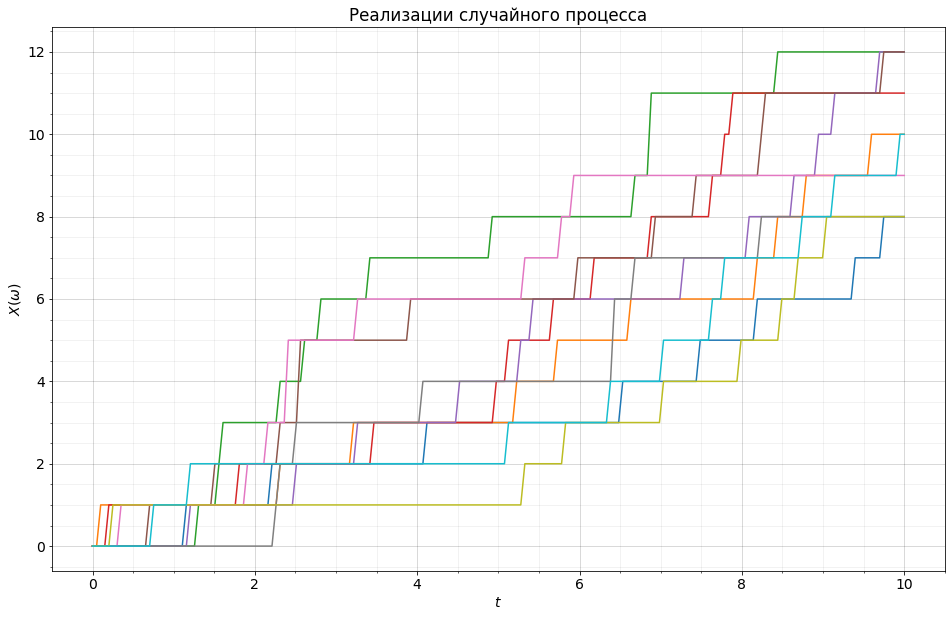

In [9]:
plot_realizations(T_1, poisson_sp_1)

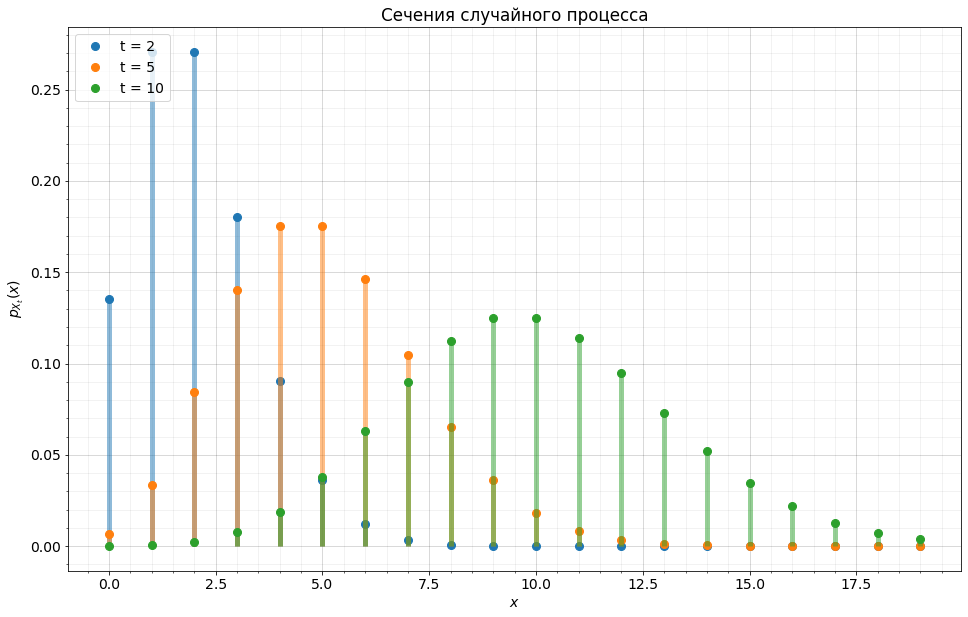

In [10]:
plot_slices(np.arange(0, 20), [(poisson(mu=lamb*t), f"t = {t}") for t in [2, 5, 10]], is_discrete=True)

Приведём альтернативное определение пуассоновского процесса, облегчающее его моделирование:
Пусть $ \xi_1, \ldots, \xi_k, \ldots \sim \text{Exp}(\lambda) $ и независимы в совокупности,
$ S_n = \xi_1 + \ldots + \xi_n $.
Тогда процесс $ X_t = \sup\{n \mid S_n \leqslant t\} $ есть пуассоновский процесс с интенсивностью $ \lambda $.

Процесс $ X_t $, построенный по случайным величинам $ \xi_k $ способом, указанным выше,
называется **процессом восстановления** и отвечает следующей модели:
в нулевой момент включается прибор, который работает время $ \xi_1 $, после чего ломается.
Одновременно с поломкой включается следующий прибор, который работает случайное время $ \xi_2 $, и так далее.
Величина $ X_t $ отражает количество приборов, введённых в эксплуатацию к моменту $ t $.

In [11]:
from scipy.stats import expon

In [12]:
def generate_poisson_sp_2(T, lamb=1.0, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций пуассоновского процесса первым методом.
    """
    
    T = np.sort(T)
    realizations = np.zeros((realizations_number, T.shape[0]))
    
    # Первый цикл - по реализациям.
    for realization_index in range(realizations_number):
        time_index = 0   # Индекс текущего момента времени
        counter = 0      # Счётчик событий.
        current_t = T[0] # Текущее время.
        
        # Второй цикл - по времени внутри реализации (до конца промежутка моделирования).
        while current_t < T[-1]:
            next_t = current_t + expon(scale=1.0/lamb).rvs(1) # Момент времени, в который произошло следующее событие.
            while time_index < T.shape[0] and T[time_index] < next_t:
                # В интервале между скачками ничего не происходит, counter не меняется.
                realizations[realization_index][time_index] = counter
                time_index += 1

            # Прохождение скачка.
            current_t = next_t
            counter += 1
    
    return realizations

In [13]:
T_2 = np.linspace(0.0, 10.0, 200)
poisson_sp_2 = generate_poisson_sp_2(T_1, lamb=lamb, realizations_number=10)

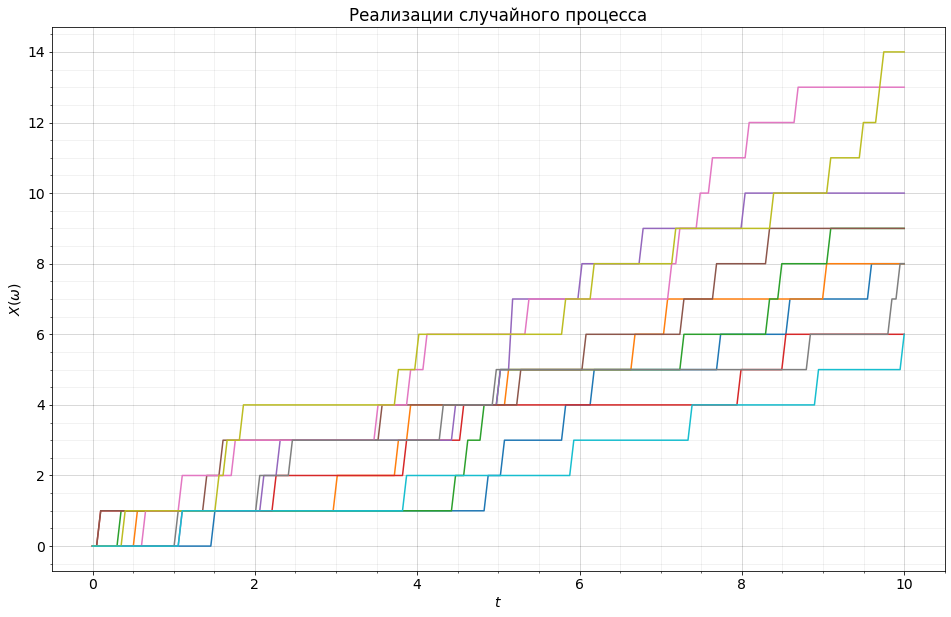

In [14]:
plot_realizations(T_2, poisson_sp_2)